In [20]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [21]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])
data['B']=2**data.d
ctrl_size = data.d.unique()
std_all = data.dev.unique()

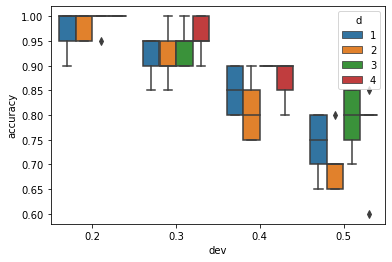

In [22]:
ax = sns.boxplot(x="dev", y="accuracy", hue="d", data=data)
plt.savefig('output/results_accuracy.png')
plt.show()

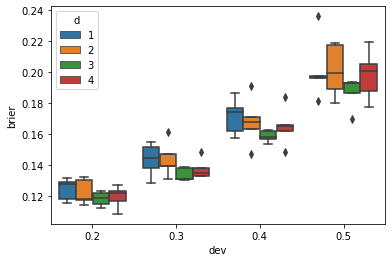

In [23]:
ax = sns.boxplot(x="dev", y="brier", hue="d", data=data)
plt.savefig('output/results_brier.png')
plt.show()

In [7]:
data_mean =data.groupby(['d', 'dev']).mean()
data_std =data.groupby(['d', 'dev']).std()

data_mean['accuracy_std'] = data_std.accuracy
data_mean['brier_std'] = data_std.brier

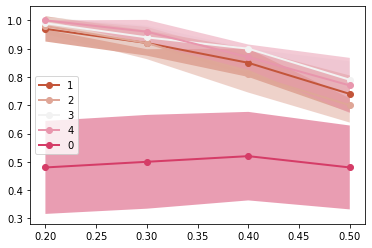

In [8]:
colors = sns.diverging_palette(20, 1, n=len(ctrl_size))

fig, ax = plt.subplots()

for d,c in zip(ctrl_size, colors):
    
    mean_data = data_mean.loc[[d]]
    
    x = mean_data.index.levels[1]
    
    # Accuracy
    y_mean = mean_data.accuracy   
    y_std = mean_data.accuracy_std
    lower = y_mean - y_std
    upper = y_mean + y_std

    ax.plot(x, y_mean, lw=2, label = str(d), color=c, marker='o')
    ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
    
    plt.legend()

In [27]:
d = data.d.unique()
B = data.B.unique()
std = data.dev.unique()

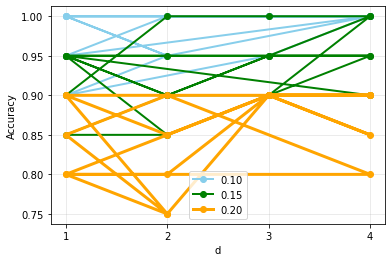

In [20]:
plt.plot(data.loc[data.dev==.20, 'd'], data.loc[data.dev==.20, 'accuracy'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.30, 'd'], data.loc[data.dev==.30, 'accuracy'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.40, 'd'], data.loc[data.dev==.40, 'accuracy'], color='orange', linewidth=3, marker='o', label='0.20')
#plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'accuracy'], color='tomato', linewidth=2, marker='o',label="0.25")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/accuracy.png', dpi=300)

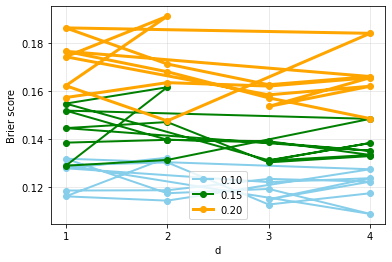

In [22]:
plt.plot(data.loc[data.dev==.20, 'd'], data.loc[data.dev==.20, 'brier'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.30, 'd'], data.loc[data.dev==.30, 'brier'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.40, 'd'], data.loc[data.dev==.40, 'brier'], color='orange', linewidth=3, marker='o', label='0.20')
#plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'brier'], color='tomato', linewidth=2, marker='o',label="0.25")
plt.legend(loc=0)
plt.ylabel('Brier score')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/brier_score.png', dpi=300)

In [23]:
import seaborn as sns

def plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='ensemble_performance.png'):
    
    # stds = np.array([0.10, .15, 0.20, .25, 0.30])
    colors = sns.diverging_palette(220, 10, n=5)

    fig, ax = plt.subplots(1)
    for i in np.arange(len(stds)):
        std= stds[i]
        color = colors[i]
        y = data.loc[data.dev==std, y_name]
        x = data.loc[data.dev==std, 'd']
        #plt.plot(x, y, color='blue',  linewidth=2)
        ax.plot(x,y, lw=2, label = std, color=color)
        # ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
        # mean = ((1+ro[1]*(T-1))/T)*err
        # lower = mean - ((1+ro[0]*(T-1))/T)*err
        # upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
        #ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
    ax.set_title('Quantum Bagging performance')
    ax.legend(loc='lower right', title = '$Std$')
    ax.set_xlabel('Number of control qubits ($d$)')
    ax.set_ylabel(y_name)
    ax.grid(alpha=0.3)
    ax.legend(bbox_to_anchor=(1.01, 1.05), title = '$Std$')
    plt.savefig('output/' + filename, dpi =300)
    plt.show()

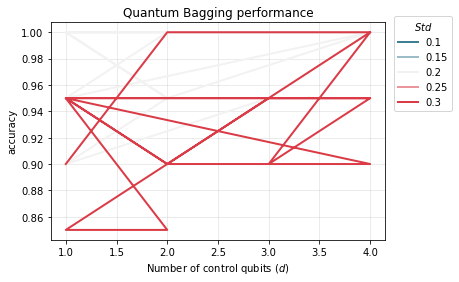

In [24]:
plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='acc_ensemble_performance.png')

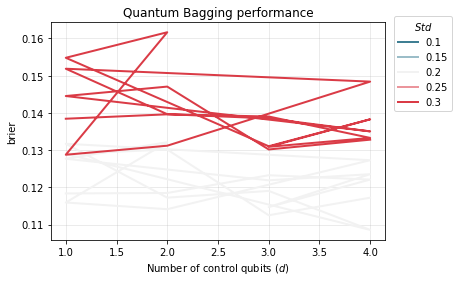

In [25]:
plot_ensemble_results(data, palette=[220,10], y_name='brier', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='brier_ensemble_performance.png')

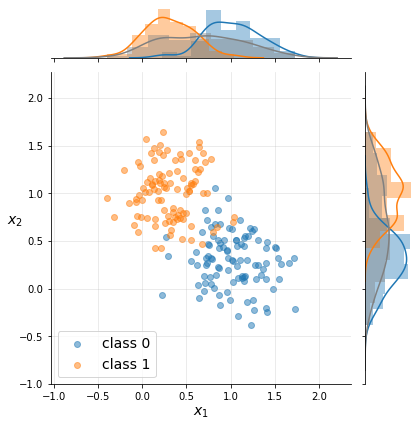

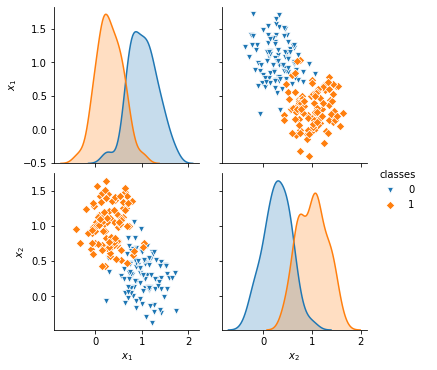

In [2]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

X,y = load_data(200, std=.3, seed=962)
data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis = 1)
data.columns = [r'$x_1$', r'$x_2$', 'classes']

g=sns.pairplot(data, hue="classes", markers=["v", "D"])#, palette='Wistia')
g._legend.set_bbox_to_anchor((1.05, .5))
plt.savefig('output/data.png', bbox_inches='tight')
plt.show()
#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
# 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r',
# 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 
# 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
# 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
# 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r',
# 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
# 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
# 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r',
# 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r',
# 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r',
# 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
# 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
# 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
# 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 
# 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r',
# 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
# 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
# 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 
# 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [73]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])

data = data.loc[data['dev'] == .3,:]
data_mean =data.groupby(['d', 'dev']).mean()
data_std =data.groupby(['d', 'dev']).std()

data_mean['accuracy_std'] = data_std.accuracy
data_mean['brier_std'] = data_std.brier
data_mean

,,N,n_train,n_swap,test_size,accuracy,brier,seed,accuracy_std,brier_std
d,dev,,,,,,,,,
1,0.3,200,2,1,0.1,0.92,0.143688,413,0.044721,0.010506
2,0.3,200,4,1,0.1,0.92,0.143847,413,0.057009,0.011439
3,0.3,200,8,1,0.1,0.94,0.133943,413,0.041833,0.004435
4,0.3,200,8,1,0.1,0.96,0.137573,413,0.041833,0.006428
